In [1]:
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
from scipy.stats import truncnorm
import math
import random
%matplotlib inline

In [2]:
# loads Iliad by Homer
text = open('/Users/david/condaProjects/ily.txt', 'r').read().splitlines()
len(text)

20736

In [3]:
# gets the average length of a row in the book in terms of words
summ = 0
N = 0

for line in text:
    if line != '':
        summ += len(line.split())
        N += 1
        
avg_words_row = summ / N
avg_words_row

7.78389150577152

In [4]:
# get a list with all the words
words = [w for row in text for w in row.split()]

In [5]:
len(words)

150377

In [6]:
# counts of each element in the list
element_counts = {}

for word in words:
    if word in element_counts:
        element_counts[word] += 1
    else:
        element_counts[word] = 1

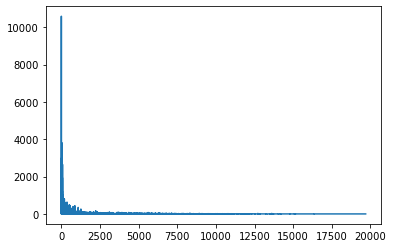

In [7]:
# plot the counts
values = np.array(list(element_counts.values()))

plt.plot(values)

In [8]:
# prevalence of low-represented words with the threshold being the ceiling of the mean of the values
len([key for key, val in element_counts.items() if val < math.ceil(values.mean())]) / len(element_counts) * 100

86.03422883550861

In [9]:
# get the number of times to add a low-represented word
to_fill_txt = {}

for key, val in element_counts.items():
    if val < math.ceil(values.mean()):
        increased_val = val * random.randint(17,33)
        element_counts[key] = increased_val
        to_fill_txt[key] = increased_val - val

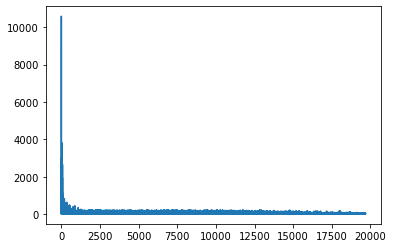

In [10]:
values = np.array(list(element_counts.values()))

plt.plot(values)

In [11]:
# most common words
for key, val in element_counts.items():
    if val > 700:
        print(key)

to
the
The
of
on
and
in
from
a
And
with
his
he
their
thy


In [12]:
# the words that need to be added to the book
balancing_extension = []

for i in to_fill_txt.keys():
    for j in range(to_fill_txt[i]):
        balancing_extension.append(i)

In [13]:
random.shuffle(balancing_extension)

In [16]:
# MOCK THE SHAPE OF THE ORIGINAL TEXT FILE
final = ""
final_list = words + balancing_extension
index = 0
while index < len(final_list):
    for _ in range(8):
        for _ in range(9):
            if index < len(final_list):
                final += (final_list[index])
                final += (' ')
                index += 1
        final += ('\n')
    final += ('\n')

In [17]:
OUTPUT = open('/Users/david/condaProjects/balanced_ily.txt', 'w')

In [18]:
OUTPUT.write(final)

7238514

In [19]:
OUTPUT.close()